In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy as sp

# Oscillations in the context of neuronal dynamics
* Delivering inputs to a numerically integrated ODE
* Understanding how parameters shape the phase plane
* Coupling neurons
* Pacemaker neurons

$$\dot{x} = f(x, I(t))$$

In [3]:
def fitzHughNagumo(state, t):
    
    v = state[0]
    w = state[1]

    dv = -v * (v - a) * (v - 1) - w + Ipulse(t, tOn, tOff, IOn, IOff)
    # I --> externally deliver current
    # a --> threshold of depolarization

    dw = eps * (v - gamma * w)
    # gamma --> sensitivity to K channels to voltage
        # * at what voltage does the negative feedback kick in
    # epsilon --> speed of the negative feedback with repect to K channels (speed of K channels)

    return(dv, dw)

In [4]:
def Ipulse(t, tOn, tOff, IOn, IOff):

    if (t > tOn) and (t < tOff): # time when we apply simulation
        I = IOn # changing the variable

    else: # or we use the unstimulated value
        I = IOff
        
    return I

In [5]:
# For plotting purposes
def computeI(t):
    I = np.zeros(len(t))
    for idx in np.arange(0, len(t), 1):
        I[idx] = Ipulse(t[idx], tOn, tOff, IOn, IOff)

    return I

(0.0, 1.0)

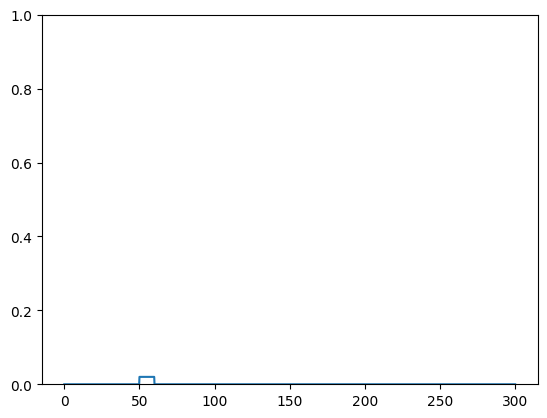

In [6]:
# simulate the neuron
t = np.linspace(0, 300, 1500)

tOn = 50
tOff = 60
IOn = 0.02
IOff = 0

plt.plot(t, computeI(t))
plt.ylim(0,1)

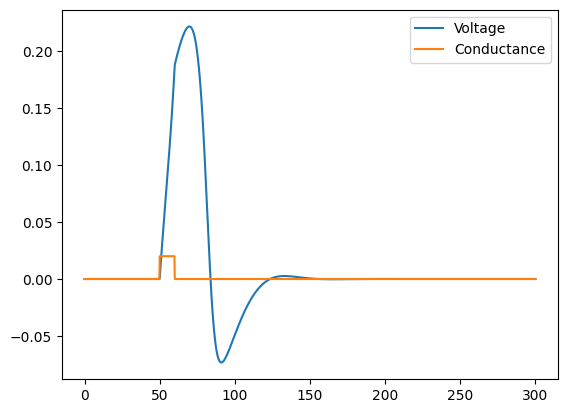

In [24]:
# now actually simulate the neuron

eps = 0.01
a = 0.1
gamma = 5

tOn = 50
tOff = 60
IOn = 0.02
IOff = 0

state0 = [0, 0]

t = np.linspace(0, 300, 1500)

# solve this equation numerically using odeint
state = odeint(fitzHughNagumo, state0, t)

# plot just voltage
plt.plot(t, state[:, 0], label = 'Voltage')

# plot conductance
plt.plot(t, computeI(t), label = 'Conductance')

plt.legend()
plt.show()


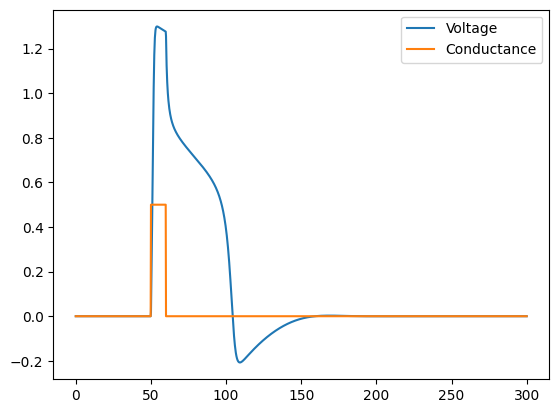

In [13]:
# playing with intensity and time

eps = 0.01
a = 0.1
gamma = 5

tOn = 50
tOff = 60
IOn = 0.5
IOff = 0

state0 = [0, 0]

t = np.linspace(0, 300, 1500)

# solve this equation numerically using odeint
state = odeint(fitzHughNagumo, state0, t)

# plot just voltage
plt.plot(t, state[:, 0], label = 'Voltage')

# plot conductance
plt.plot(t, computeI(t), label = 'Conductance')

plt.legend()
plt.show()

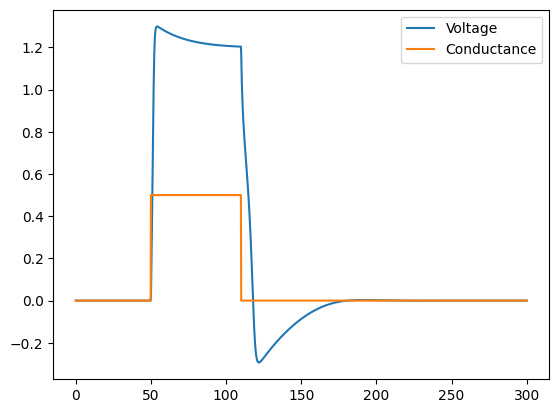

In [17]:
# playing with intensity and time

eps = 0.01
a = 0.1
gamma = 5

tOn = 50
tOff = 110
IOn = 0.5
IOff = 0

state0 = [0, 0]

t = np.linspace(0, 300, 1500)

# solve this equation numerically using odeint
state = odeint(fitzHughNagumo, state0, t)

# plot just voltage
plt.plot(t, state[:, 0], label = 'Voltage')

# plot conductance
plt.plot(t, computeI(t), label = 'Conductance')

plt.legend()
plt.show()

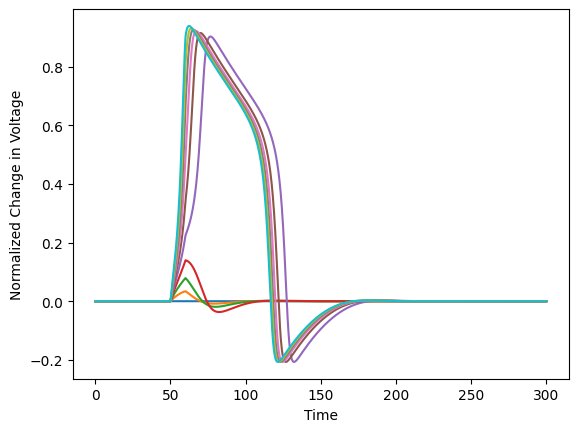

In [30]:
# how does the external voltage parameter change the neuronal behavior

eps = 0.01
a = 0.1
gamma = 5

tOn = 50
tOff = 60
IOn = 0.5
IOff = 0

state0 = [0, 0]

t = np.linspace(0, 300, 1500)

# solve this equation numerically using odeint
state = odeint(fitzHughNagumo, state0, t)
for i in np.linspace(0, 0.05, 10): # incrementing I for 10 separate simulations
    IOn = i # assign I
    state = odeint(fitzHughNagumo, state0, t) # simulate new neuron with incremented IOn
    plt.plot(t, state[:, 0])
    plt.ylabel('Normalized Change in Voltage')
    plt.xlabel('Time')

Text(0.5, 1.0, 'Sample Values of I')

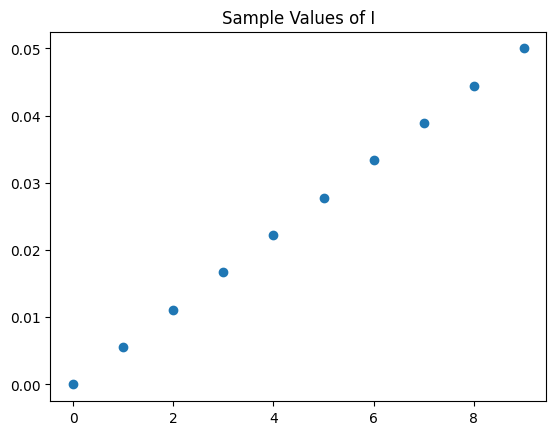

In [28]:
plt.plot(np.arange(10), np.linspace(0, 0.05, 10), 'o')
plt.title('Sample Values of I')

In [34]:
# Coupling neurons

def fitzHughNagumo_coupled(state, t):
    # define the state variables for 2 coupled neurons
    # neuron 1
    v1 = state[0]
    w1 = state[1]

    # neuron 2 state variables
    v2 = state[2]
    w2 = state[3]

    dv1 = -v1 * (v1 - a) * (v1 - 1) - w1 + Ipulse(t, tOn, tOff, IOn, IOff)
    dw1 = eps * (v1 - gamma * w1)

    dv2 = -v2 * (v2 - a) * (v2 - 1) - w2 + (v1 - v2)/r
    dw2 = eps * (v2 - gamma * w2)

    return (dv1, dw1, dv2, dw2)

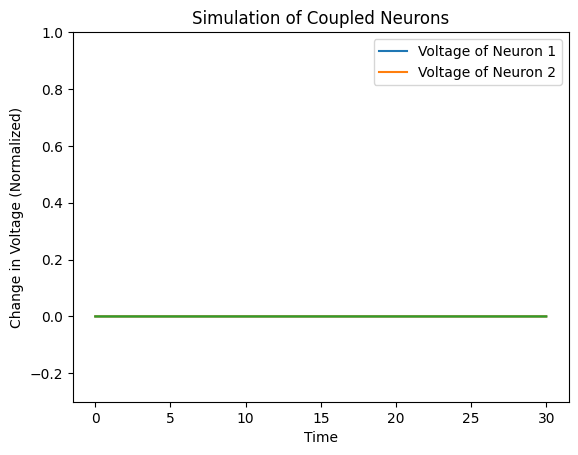

In [35]:
# simulate coupled neurons

tOn = 50
tOff = 60
IOn = 0.4
IOff = 0

state0 = [0, 0, 0, 0]

t = np.linspace(0, 30, 1500)

r = 50

state = odeint(fitzHughNagumo_coupled, state0, t)

plt.plot(t, state[:, 0], label = 'Voltage of Neuron 1')
plt.plot(t, state[:, 2], label = 'Voltage of Neuron 2')

plt.plot(t, computeI(t))

plt.ylim(-0.3, 1)
plt.ylabel('Change in Voltage (Normalized)')
plt.xlabel('Time')
plt.title('Simulation of Coupled Neurons')
plt.legend()
plt.show()

# Drawing the Nullclines of This System

$$\dot{v} = -v(v - a)(v - 1) - w$$

$$\dot{w} = \epsilon (v - \gamma w)$$

so the v nullcline:

$$ w = -v(v - a)(v - 1)$$

and the w nullcline:

$$v = \gamma w$$

In [40]:
def vNullcline(v, a_n):
    w = -v * (v - a_n) * (v - 1)
    return w

def wNullcline(w, gamma_n):
    v = gamma_n * w
    return v


# gamma controls slope of w nullcline

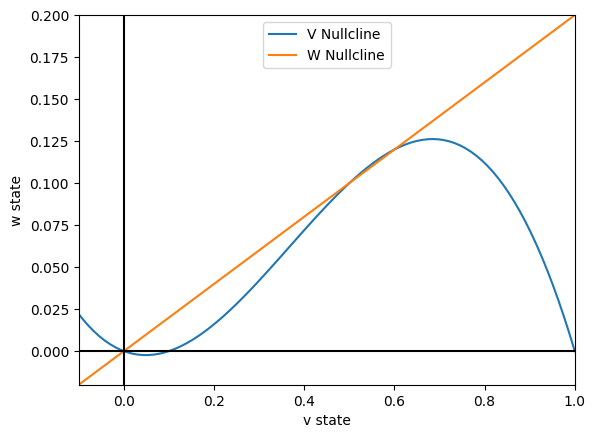

In [39]:
# plot the nullclines

v = np.linspace(-0.2, 1, 100)
w = np.linspace(-0.1, 0.3, 100)

plt.plot(v, vNullcline(v, a))
plt.plot(wNullcline(w, gamma), w)
plt.legend(('V Nullcline', 'W Nullcline'))
plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlim(-0.1, 1)
plt.ylim(-0.02, 0.2)

plt.xlabel('v state')
plt.ylabel('w state')
plt.show()

(-0.3, 1.0)

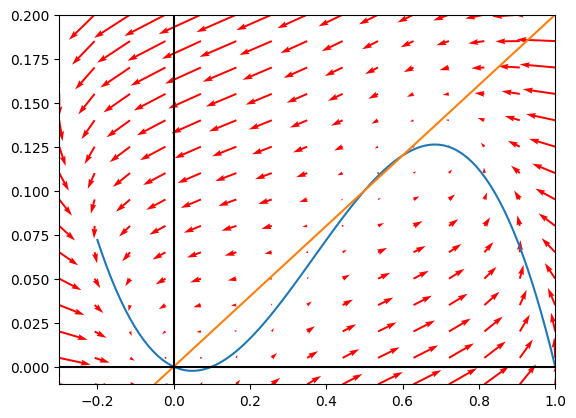

In [43]:
# plotting the phase diagram
def fitzHughNagumo_NoI(state, t):
    
    v = state[0]
    w = state[1]

    dv = -v * (v - a) * (v - 1) - w
    dw = eps * (v - gamma * w)

    return(dv, dw)

xlim = [-.3, 1]
ylim = [-.01, .2]

npoints = 15

s1 = np.linspace(xlim[0], xlim[1], npoints)
s2 = np.linspace(ylim[0], ylim[1], npoints)

S1, S2 = np.meshgrid(s1, s2)

q, p = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = S2[i, j]

        S_dot = fitzHughNagumo_NoI([x, y], [])

        p[i, j] = S_dot[0]
        q[i, j] = S_dot[1]/.1 # scale by 10x to visualize

plt.quiver(S1, S2, p, q, color = 'r')
plt.plot(v, vNullcline(v, a))
plt.plot(wNullcline(w, gamma), w)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim(ylim[0], ylim[1])
plt.xlim(xlim[0], xlim[1])
